USED BIKE PRICE DATASET ANALYSIS

In [66]:
#importing libraries for dataset traversal and manipulation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [67]:
#reading the csv dataset
data = pd.read_csv("C:/Users/DELL/Downloads/bikes.csv")

In [68]:
data.head()  # Display the first few rows of the dataset

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [69]:
#no. of records and fiels in the dataset
data.shape

(7857, 8)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


FEATURE ENGINEERING

In [71]:
 cc = []
 for veh in data.model_name:
   models = veh.split(" ")
   models = " ".join(models[:len(models)-1]).lower()
   if re.search('[0-9]*cc',models,flags=re.I) != None:
       if models[re.search('[0-9]*cc',models,flags=re.I).start():re.search('[0-9]*cc',models,flags=re.I).end()] not in ['cc']:
            cc.append(models[re.search('[0-9]*cc',models,flags=re.I).start():re.search('[0-9]*cc',models,flags=re.I).end()])
       else:
            cc.append(models)
   elif re.search('[0-9]* (cc)',models,flags=re.I) != None:
        cc.append(models[re.search('[0-9]*(cc)',models,flags=re.I).start():re.search('[0-9]*(cc)',models,flags=re.I).end()] )
   elif "hyosung" in models:
        cc.append(models)
   else:
        cc.append(models)

In [72]:
unique_cc = list(set(cc))  # Get all unique values from the list cc
print(unique_cc)

['tvs apache rtr 200 4v race edition 2.0', 'honda cb hornet 160r  abs std', 'ideal jawa yezdi delux 250 cc', 'bajaj avenger street 180', 'tvs apache rtr 200 4v carburetor race edition 2.0', 'tvs apache rr310', 'tvs apache rtr 160 4v disc abs', 'tvs star city plus dual tone bs6', '200cc', 'benelli tnt 600 gt', 'benelliimperiale 400 bs6', 'hero passion pro  100 cc', 'harley-davidson night rod special', 'harley-davidson roadster', '800cc', 'benelli 302s', 'aprilia rsv4 rr', 'bmw s 1000 xr pro', 'kawasaki z1000', 'harley-davidson iron 883', 'bajaj discover 100t', 'hero passion xpro 110 cc', 'harley-davidson fat bob', 'bajaj ct 100 es alloy cbs', 'bajaj avenger cruise 220', 'triumph street triple s', 'bajaj avenger cruise 220 abs', 'bajaj pulsar 180f', 'honda cbr650f', '125cc', 'harley-davidson street 750 abs', 'um renegade sport s', 'harley-davidson street 750', '150cc', 'honda h’ness cb 350 dlx', '223cc', '300cc', 'bajaj pulsar ns160 rear disc abs', 'hyosung gt650r', 'tvs apache rtr 200 4

In [73]:
for i in range(len(cc)):
  if "1000" in cc[i]:
     cc[i] = "1000cc"
  elif "310" in cc[i]:
     cc[i] = "310cc"
  elif "apache rtr 200" in cc[i]:
     cc[i] = "200cc"
  elif "ns200" in cc[i]:
     cc[i] = "200cc"
  elif "rs200" in cc[i]:
     cc[i] = "200cc"
  elif "220" in cc[i]:
     cc[i] = "220cc"
  elif "400" in cc[i]:
     cc[i] = "400cc"
  elif "250" in cc[i]:
     cc[i] = "250cc"
  elif "125" in cc[i]:
     cc[i] = "125cc"
  elif "160" in cc[i]:
     cc[i] = "160cc"
  elif "150" in cc[i]:
     cc[i] = "150cc"
  elif "350" in cc[i]:
     cc[i] = "350cc"
  elif "200" in cc[i]:
     cc[i] = "200cc"
  elif "100" in cc[i]:
     cc[i] = "100cc"
  elif "180" in cc[i]:
     cc[i] = "180cc"
  elif "110" in cc[i]:
     cc[i] = "110cc"
  elif "390" in cc[i]:
     cc[i] = "390cc"
  elif "135" in cc[i]:
     cc[i] = "135cc"
  elif "r15" in cc[i]:
     cc[i] = "150cc"
  elif "650" in cc[i]:
     cc[i] = "650cc"
  elif "750" in cc[i]:
     cc[i] = "750cc"
  elif "800" in cc[i]:
     cc[i] = "800cc"
  elif "300" in cc[i]:
     cc[i] = "300cc"
  elif "765" in cc[i]:
     cc[i] = "765cc"
  elif "883" in cc[i]:
     cc[i] = "883cc"
  elif "797" in cc[i]:
     cc[i] = "797cc"
  elif "810" in cc[i]:
     cc[i] = "810cc"
  elif "321" in cc[i]:
     cc[i] = "321cc"
  elif "821" in cc[i]:
     cc[i] = "821cc"
  elif "120" in cc[i]:
     cc[i] = "120cc"
  elif "1745" in cc[i]:
     cc[i] = "1745cc"
  elif "899" in cc[i]:
     cc[i] = "899cc"
  elif "900" in cc[i]:
     cc[i] = "900cc"
  elif "302" in cc[i]:
     cc[i] = "302cc"
  elif "959" in cc[i]:
     cc[i] = "959cc"
  elif "600" in cc[i]:
     cc[i] = "600cc"
  elif "502" in cc[i]:
     cc[i] = "502cc"
  elif "um renegade" in cc[i]:
     cc[i] = "279cc"
  elif "hero splendor" in cc[i]:
     cc[i] = "97cc"
  elif "hero passion plus" in cc[i]:
     cc[i] = "97cc"
  elif "yamaha fz" in cc[i]:
     cc[i] = "150cc"
  elif "honda hornet" in cc[i]:
     cc[i] = "184cc"
  elif "royal enfield interceptor" in cc[i]:
     cc[i] = "650cc"
  elif "hero passion pro" in cc[i]:
     cc[i] = "113cc"
  elif "hero passion xpro" in cc[i]:
     cc[i] = "109cc"
  elif "harley-davidson street bob" in cc[i]:
     cc[i] = "1868cc"
  elif "harley-davidson fat bob" in cc[i]:
     cc[i] = "1868cc"
  elif "harley-davidson fat boy" in cc[i]:
     cc[i] = "1868cc"
  elif "harley-davidson street rod" in cc[i]:
     cc[i] = "749cc"
  elif "zx-10r" in cc[i]:
     cc[i] = "1000cc"
  elif "rsv4" in cc[i]:
     cc[i] = "1099cc"
  elif "tvs sport" in cc[i]:
     cc[i] = "109cc"
  elif "tvs star city" in cc[i]:
     cc[i] = "109cc"
  elif "harley-davidson superlow" in cc[i]:
     cc[i] = "883cc"
  elif "harley-davidson roadster" in cc[i]:
     cc[i] = "1202cc"
  elif "harley-davidson forty eight" in cc[i]:
     cc[i] = "1202cc"
  elif "harley-davidson night rod special" in cc[i]:
     cc[i] = "1247cc"
  elif "triumph rocket iii roadster" in cc[i]:
     cc[i] = "2458cc"
  elif "triumph thunderbird lt" in cc[i]:
     cc[i] = "1699cc"
  elif "kawasaki vulcan s black" in cc[i]:
     cc[i] = "649cc"
  elif "mahindra mojo black pearl" in cc[i]:
     cc[i] = "300cc"
  elif "ducati diavel carbon" in cc[i]:
     cc[i] = "1198cc"
  elif "triumph tiger explorer" in cc[i]:
     cc[i] = "1215cc"
  elif "royal enfield continental" in cc[i]:
     cc[i]="650cc"
  elif "triumph street triple s" in cc[i]:
     cc[i]="765cc"
  elif "harley-davidson breakout"in cc[i]:
     cc[i]="1868cc"
  elif "harley-davidson cvo"in cc[i]:
     cc[i]="1923cc"


In [74]:
unique_cc = list(set(cc))
print(unique_cc)

['279cc', '109cc', '200cc', '110cc', '800cc', '899cc', '1202cc', '1099cc', '250cc', '410cc', '97cc', '295cc', '400cc', '959cc', '1700cc', '120cc', '310cc', '821cc', '149cc', '125cc', '350cc', '650cc', '150cc', '300cc', '223cc', '135cc', '330cc', '797cc', '100cc', '220cc', '1380cc', '1923cc', '390cc', '675cc', '1000cc', '649cc', '160cc', '184cc', '765cc', '535cc', '600cc', '302cc', '1247cc', '1262cc', '2458cc', '180cc', '865cc', '1050cc', '502cc', '1198cc', '1215cc', '900cc', '749cc', 'hero karizma 223 cc', '320cc', '883cc', '1868cc', '1699cc', '750cc', '500cc', '1745cc']


In [75]:
cc[cc.index('hero karizma 223 cc')]='223cc'
cc=[int(i.replace('cc',''))for i in cc]

In [76]:
#storing cc of all vehicles in the dataset
data['cc'] = cc
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330


In [77]:
#Split the model name by spaces and take first split as the brand name
np.unique([i.split()[0] for i in data.model_name])

array(['Aprilia', 'BMW', 'Bajaj', 'Benelli', 'BenelliImperiale', 'Ducati',
       'Fb', 'Harley-Davidson', 'Hero', 'Honda', 'Husqvarna', 'Hyosung',
       'Ideal', 'Indian', 'Jawa', 'KTM', 'Kawasaki', 'MV', 'Mahindra',
       'Moto', 'Royal', 'Suzuki', 'TVS', 'Triumph', 'UM', 'Yamaha',
       'Yazdi', 'yamaha'], dtype='<U16')

As you can see that benelli imperial and Yamaha brand , both has two distinct enetries but for same brand so we need to fix it first 

In [78]:
data[data.model_name.str.contains("BenelliImperiale") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
2809,BenelliImperiale 400 BS6 2020,2020,2800 Km,first owner,mumbai,\n\n 35 kmpl,20.7 bhp,207500,400
2978,BenelliImperiale 400 2020,2020,1500 Km,first owner,mumbai,\n\n,20.7 bhp,207500,400
2979,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,206462,400
4177,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,220000,400
4399,BenelliImperiale 400 2020,2020,7700 Km,first owner,bangalore,\n\n,20.7 bhp,220000,400
5177,BenelliImperiale 400 2020,2020,1900 Km,first owner,secunderabad,\n\n,20.7 bhp,240000,400


In [79]:
data.model_name.replace('BenelliImperiale 400 2020','Benelli Imperiale 400 2020',inplace=True)
data.model_name.replace('BenelliImperiale 400 BS6 2020','Benelli Imperiale 400 BS6 2020',inplace=True)


In [80]:
data[data.model_name.str.contains("yamaha") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
7306,yamaha Libero 110cc 2006,2006,50000 Km,first owner,ghaziabad,\n\n,NaN,6000,110


In [81]:
data[data.model_name.str.contains("Yamaha") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,\n\n 58 Kmpl,13 bhp,40000,150
26,Yamaha SZ-RR 150cc 2012,2012,12000 Km,first owner,delhi,\n\n 55 kmpl,12 Bhp,28000,150
27,Yamaha FZs 150cc 2015,2015,10168 Km,first owner,delhi,\n\n 45 kmpl,13 bhp,44000,150
34,Yamaha FZ S V 2.0 150cc 2017,2017,Mileage 58 Kmpl,first owner,mumbai,\n\n 58 Kmpl,13 bhp,47475,150
66,Yamaha FZs 150cc 2012,2012,60000 Km,first owner,delhi,\n\n 45 kmpl,13 bhp,32000,150
...,...,...,...,...,...,...,...,...,...
7792,Yamaha YZF-R15 2.0 150cc 2013,2013,15000 Km,first owner,pathankot,\n\n 42 kmpl,16.70 bhp,58000,150
7814,Yamaha Gladiator 125cc 2011,2011,20000 Km,first owner,chennai,\n\n 64 kmpl,10.8ps,0,125
7827,Yamaha YZF-R15 150cc 2014,2014,0 Km,first owner,faridabad,\n\n 42 kmpl,16 bhp,70000,150
7838,Yamaha FZ16 150cc 2015,2015,Mileage 58 Kmpl,first owner,delhi,\n\n 58 Kmpl,13 bhp,47500,150


In [82]:
#to fix yamaha brand name
data.model_name.replace('yamaha Libero 110cc 2006','Yamaha Libero 110cc 2006	',inplace=True)

In [83]:
np.unique([i.split()[0] for i in data.model_name])

array(['Aprilia', 'BMW', 'Bajaj', 'Benelli', 'Ducati', 'Fb',
       'Harley-Davidson', 'Hero', 'Honda', 'Husqvarna', 'Hyosung',
       'Ideal', 'Indian', 'Jawa', 'KTM', 'Kawasaki', 'MV', 'Mahindra',
       'Moto', 'Royal', 'Suzuki', 'TVS', 'Triumph', 'UM', 'Yamaha',
       'Yazdi'], dtype='<U15')

In [84]:
#to add brand names column in the dataset
brands=[i.split()[0] for i in data.model_name]
data['brand']=brands

In [85]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330,Jawa


In [86]:
data[data.model_name.str.contains("Ideal") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
2638,Ideal Jawa Yezdi Delux 250 cc 1978,1978,85000 Km,first owner,chikamaglur,\n\n,NaN,100000,250,Ideal


In [87]:
#to fix ideal brand name with jawa
data.replace('Ideal','Jawa',inplace=True)

In [88]:
data.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
cc             0
brand          0
dtype: int64

NOW , MANIPULATING MILEAGE FEATURE

In [89]:
mil=data.mileage.to_list()
mil=[str(i).lower().replace('kmpl','').split("-")[0] for i in mil]
mil=[str(i).lower().replace('kms','') for i in mil]
mil=[str(i).replace('\n','') for i in mil]
mil=[str(i).strip() for i in mil]
data.mileage = mil

In [90]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500,330,Jawa


In [91]:
m=list(set(mil))
m

['',
 '35',
 '63',
 '62',
 '29',
 '32',
 '64',
 '54',
 '85',
 '55',
 '18.86',
 '68',
 '77',
 '83',
 '60',
 '90',
 '22',
 '20.3',
 '25',
 '56',
 '52',
 '70',
 '63.97',
 '12.5',
 '39.4',
 '28',
 '96.9',
 '89',
 '30',
 '72',
 '16',
 '71',
 '45',
 '39.1',
 '20.40',
 '45.8',
 '17.85',
 '57',
 '80',
 '67',
 '27',
 '13',
 '65',
 '14',
 '53',
 '40',
 '48',
 '46.40',
 '81',
 '42',
 '12',
 'liquid cooled',
 '23',
 '74',
 '37',
 '58',
 '19',
 '26',
 '75',
 '20',
 '21',
 '82.4',
 '104',
 '53.72',
 '82',
 '17',
 '15',
 '95',
 '55.47',
 '38',
 '43',
 '59',
 '69',
 '18',
 '84',
 '50',
 '31.85',
 '38.5',
 '5',
 'nan']

In [92]:
data.replace('','0',inplace=True)
data.replace('nan','0',inplace=True)
data.replace('liquid cooled','0',inplace=True)

In [93]:
data.mileage = data['mileage'].astype(float)

In [94]:
mean_mileage_by_brand = data.groupby('brand')['mileage'].mean()
mean_mileage_by_brand 

brand
Aprilia             6.000000
BMW                 0.000000
Bajaj              49.399021
Benelli            15.254237
Ducati             15.143125
Fb                  0.000000
Harley-Davidson    19.740643
Hero               50.116621
Honda              53.383208
Husqvarna          28.954545
Hyosung            23.833333
Indian             14.000000
Jawa                0.000000
KTM                25.847251
Kawasaki           21.313433
MV                 15.000000
Mahindra           47.222222
Moto               12.000000
Royal              32.134857
Suzuki             38.533632
TVS                42.275026
Triumph            16.000000
UM                 35.000000
Yamaha             38.775401
Yazdi               0.000000
Name: mileage, dtype: float64

In [95]:
data.fillna({'mileage': data.groupby('brand')['mileage'].mean()}, inplace=True) 
data.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage        0
power         31
price          0
cc             0
brand          0
dtype: int64

In [96]:
m=list(set(data['mileage']))
m

[0.0,
 5.0,
 12.0,
 13.0,
 12.5,
 15.0,
 16.0,
 17.0,
 18.0,
 18.86,
 20.0,
 21.0,
 22.0,
 19.0,
 17.85,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.85,
 32.0,
 35.0,
 37.0,
 38.0,
 39.4,
 40.0,
 38.5,
 42.0,
 43.0,
 39.1,
 45.0,
 45.8,
 46.4,
 48.0,
 50.0,
 52.0,
 53.0,
 54.0,
 53.72,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 55.47,
 62.0,
 63.0,
 64.0,
 65.0,
 63.97,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 14.0,
 74.0,
 75.0,
 77.0,
 80.0,
 81.0,
 82.4,
 83.0,
 84.0,
 85.0,
 82.0,
 89.0,
 90.0,
 95.0,
 96.9,
 20.4,
 104.0,
 23.0,
 20.3]

In [97]:
data.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage        0
power         31
price          0
cc             0
brand          0
dtype: int64

MANUPULATING LOCATION FEATURE

In [98]:
m=list(set(data['location']))
m

['mubarakpur',
 'madhupur',
 'avadi',
 'chinchwad',
 'gurdaspur',
 'mhasla',
 'anantnag',
 'silchar',
 'banka',
 'kolar',
 'masaurhi',
 'alwar',
 'malout',
 'dewas',
 'panchkula',
 '24 pargana',
 'bagalkot',
 'rajsamand',
 'tiruchirappalli',
 'baramati',
 'chitradurga',
 'goraya',
 'mahboobnagar',
 'kochi',
 'bhuj',
 'erode',
 'kherli',
 'trivandrum',
 'dibrugarh',
 'ambala',
 'valsad',
 'purulia',
 'nalbari',
 'challakere',
 'kendrapara',
 'adyar',
 'sonipat',
 'jamshedpur',
 'nellore',
 'shimla',
 'fatehgarh sahib',
 'indi',
 'kanyakumari',
 'aonla',
 'hisar',
 'navsari',
 'hubli',
 'gadag',
 'burdwan',
 'chas',
 'hyderabad',
 'surat',
 'sabarkantha',
 'alibag',
 'bikaner',
 'assandh',
 'adalaj',
 'ponda',
 'jhansi',
 'ghazipur',
 'bagru',
 'qadian',
 'salem',
 'khedbrahma',
 'darbhanga',
 'rajnandgaon',
 'patan',
 'herbertpur',
 'pathankot',
 'agartala',
 'khagaria',
 'karim nagar',
 'chennai',
 'nagapattinam',
 'dakshina kannada',
 'bahadurpur',
 'mumbai',
 'akkalkot',
 'akola',
 '

In [99]:
#records having empty location
data[data['location'].isnull()]


,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
1131,Honda CBR 150R 150cc 2014,2014,22500 Km,first owner,NaN,38.0,18.28 bhp,55000,150,Honda
1186,Hero CBZ Xtreme 150cc 2015,2015,23385 Km,second owner,NaN,65.0,14.4PS,20517,150,Hero
1296,UM Renegade Commando 2018,2018,6500 Km,second owner,NaN,35.0,24.80 bhp,100000,279,UM
1845,Yamaha Fazer 150cc 2015,2015,Mileage 45 Kmpl,first owner,NaN,45.0,13 bhp,31250,150,Yamaha
1894,KTM RC 200cc ABS 2019,2019,20000 Km,first owner,NaN,35.0,25.10 bhp,165900,200,KTM
1916,Bajaj V15 150cc 2017,2017,28000 Km,second owner,NaN,57.0,11.80 bhp,32000,150,Bajaj
2824,Honda CB Shine 125cc 2014,2014,Mileage 65 Kmpl,first owner,NaN,65.0,10 bhp,40680,125,Honda
2851,Yamaha FZ S V 2.0 150cc 2018,2018,Mileage 58 Kmpl,first owner,NaN,58.0,13 bhp,65000,150,Yamaha
2855,Royal Enfield Classic 350cc 2015,2015,16500 Km,first owner,NaN,35.0,19.80 Bhp,109400,350,Royal
2959,Hero Splendor iSmart 110cc 2015,2015,39571 Km,first owner,NaN,45.0,7 Kw,24000,110,Hero


In [100]:
#filling empty location with 'unknown'
data.fillna({'location': 'unknown'}, inplace=True)
data.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location       0
mileage        0
power         31
price          0
cc             0
brand          0
dtype: int64

MANIPULATING THE POWER FEATURE

In [101]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,0.0,30 bhp,197500,330,Jawa


In [102]:
p=list(set(data['power']))
p

['11.64 bhp',
 '23.7 bhp',
 '9.4 Bhp',
 '17.30 bhp',
 '16.1 bhp',
 '157.80 bhp',
 '19 bhp',
 '24.2 BHP',
 '93 bhp',
 '74 bhp',
 '19.80 Bhp',
 '18.3 bhp',
 '7 Kw',
 '8.20 bhp',
 '7.44bhp',
 '64 bhp',
 '8.90 bhp',
 '31.50 bhp',
 '29.2 bhp',
 '18bhp',
 '6.15kW (8.36 Ps)',
 '29.63 bhp',
 '27.20 bhp',
 '8.6 PS',
 '178.11 PS',
 '60 bhp',
 '110.40 bhp',
 '8.5 PS',
 '34.50 bhp',
 '19.8 bhp',
 '12.8ps',
 '30 bhp',
 '20.11 bhp',
 '12 bhp',
 '113 bhp',
 '15 bhp',
 '13.7 Bhp',
 '159.80 bhp',
 '23 bhp',
 '14 BHP',
 '23.2 bhp',
 '25 bhp',
 '20.70 bhp',
 '10.5 bhp',
 '8.2 Bhp @ 8000 rpm',
 '26.82 BHP',
 '14.9 kW (20 BHP)',
 '12bhp',
 '7.60 bhp',
 '41.40 bhp',
 '12 Bhp',
 '13 bhp',
 '24.60 bhp',
 '25.1 bhp',
 '7.8 PS',
 '39 bhp',
 '8.5 Bhp',
 '6.15 kW (8.36 Ps)',
 '23.19 bhp',
 '15.2 bhp @ 8500 rpm',
 '13.82 Bhp',
 '24.80 bhp',
 '7.5 Bhp',
 '16.80 bhp',
 '79 bhp',
 '83.2 bhp',
 '24.13 bhp',
 '37.73 bhp',
 '186.30 bhp',
 '29.6 bhp',
 '14.6 bhp',
 '20.51 bhp',
 '26.37 PS',
 '8.56bhp',
 '15.60 bhp',
 '11

In [103]:
data['power']=data.power.replace('bhp','',regex=True)
data['power']=data.power.replace('Bhp','',regex=True)
data['power']=data.power.replace('BHP','',regex=True)
data['power']=data.power.replace('hp','',regex=True)

In [104]:
p=list(set(data['power']))
p

['24 ',
 '70 ',
 '123.30 ',
 '16.1 ',
 '25 ',
 '8.10 ',
 '8.3 ',
 '96.60 ',
 '159.80 ',
 '29.6 ',
 '26.1 ',
 '8.50 ',
 '13.7  @ 8500 rpm',
 '11 ',
 '20.70 ',
 '96 ',
 '23.20 ',
 '26.15 ',
 '7 Kw',
 '8.6 ',
 '19.8 ',
 '26.82 ',
 '19.1 ',
 '24.80 ',
 '18.1 ',
 '10.70 ',
 '6.15kW (8.36 Ps)',
 '8.6 PS',
 '178.11 PS',
 '14.20 ',
 '64 ',
 '7.60 ',
 '154.85 ',
 '16.80 ',
 '8.5 PS',
 '24.60 ',
 '12.8ps',
 '12.9 ',
 '17.30 ',
 '47 ',
 '84.11 ',
 '115 ',
 '25  @ 10,000 rpm',
 '23.2 ',
 '15.44 ',
 '24.3 ',
 '110.40 ',
 '13.93 ',
 '15.1 ',
 '9.50 ',
 '19 ',
 '14.5',
 '26.21 ',
 '7.8 PS',
 '21 ',
 '8 ',
 '24.2 ',
 '6.15 kW (8.36 Ps)',
 '7.44',
 '7.40 ',
 '42.3 ',
 '11.64 KW (15.6 )',
 '20.2 ',
 '26.45 ',
 '15.30 ',
 '8.08 ',
 '7.70 ',
 '26.37 PS',
 '180 ',
 '8.5 ',
 '24.6 ',
 '8.56',
 '93.70 ',
 '14.79 ',
 '74 ',
 '12 ',
 '93 ',
 '176 ',
 '25.35 ',
 '14.3 ',
 '12.2 ',
 '153.80 ',
 '94.68 ',
 '25.10 ',
 '83.2 ',
 '17 ',
 '38.26 ',
 '39 ',
 '13.8 ',
 '29.10 ',
 '12.0 PS',
 '16.70 ',
 '119.37 ',
 '15.

In [105]:
#records containing power in ps
data[data['power'].str.contains('ps', case=False, na=False)]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
107,Bajaj Pulsar NS160 2018,2018,11000 Km,second owner,delhi,0.0,15.5 PS,90000,160,Bajaj
159,Hero CBZ Xtreme 150cc 2011,2011,35000 Km,first owner,gurgaon,65.0,14.4PS,25000,150,Hero
192,Bajaj Discover 125cc 2017,2017,37000 Km,first owner,reasi,65.0,12.5 ps,32250,125,Bajaj
222,Hero HF Deluxe Kick Alloy 100cc 2019,2019,36000 Km,first owner,chittorgarh,55.0,6.15kW (8.36 Ps),53000,100,Hero
241,Bajaj Discover 125cc 2013,2013,40000 Km,first owner,hyderabad,65.0,12.5 ps,32000,125,Bajaj
...,...,...,...,...,...,...,...,...,...,...
7814,Yamaha Gladiator 125cc 2011,2011,20000 Km,first owner,chennai,64.0,10.8ps,0,125,Yamaha
7818,Bajaj Discover 125cc 2009,2009,26154 Km,first owner,chennai,65.0,12.5 ps,16500,125,Bajaj
7819,Bajaj Discover 110cc 2015,2015,15625 Km,first owner,chennai,72.0,8.51 PS,30000,110,Bajaj
7839,Bajaj Discover 125ST 2013,2013,40000 Km,first owner,chennai,65.0,12.5 ps,22000,125,Bajaj


In [106]:
pps= list(set(data[data['power'].str.contains('ps', case=False, na=False)]['power']))
pps

['26.37 PS',
 '15.5 PS',
 '10.8ps',
 '6.1 kW (8.3PS)',
 '6.15kW (8.36 Ps)',
 '8.6 PS',
 '178.11 PS',
 '13.0 PS',
 '8.5 PS',
 '14.4PS',
 '12.8ps',
 '12.0 PS',
 '9.7 PS',
 '7.1 PS',
 '12.5 ps',
 '8.51 PS',
 '23.9 PS',
 '11.2 PS',
 '6.72 KW (9.1 Ps)',
 '7.8 PS',
 '6.15 kW (8.36 Ps)']

In [107]:
data['power']=data['power'].replace('6.1 kW (8.3PS)','8.3PS')
data['power']=data['power'].replace('6.72 KW (9.1 Ps)','9.1PS')
data['power']=data['power'].replace('6.15kW (8.36 Ps)','8.36PS')
data['power']=data['power'].replace('6.15 kW (8.36 Ps)','8.36PS')

In [108]:
pps= list(set(data[data['power'].str.contains('ps', case=False, na=False)]['power']))
pps


['26.37 PS',
 '15.5 PS',
 '8.36PS',
 '10.8ps',
 '9.1PS',
 '8.6 PS',
 '178.11 PS',
 '13.0 PS',
 '8.5 PS',
 '14.4PS',
 '12.8ps',
 '12.0 PS',
 '9.7 PS',
 '7.1 PS',
 '12.5 ps',
 '8.51 PS',
 '8.3PS',
 '23.9 PS',
 '11.2 PS',
 '7.8 PS']

In [109]:

for i in pps:
    a=i
    if 'P' in i:
        i=i.split('P')[0]
    else:
        i=i.split('p')[0]
    i=float(i)
    i=i*0.986
    i=str(i)
    data['power']=data['power'].replace(a,i)
    

    

In [110]:
p=list(set(data['power']))
p

['12.818',
 '24 ',
 '70 ',
 '123.30 ',
 '16.1 ',
 '25 ',
 '8.10 ',
 '8.3 ',
 '96.60 ',
 '159.80 ',
 '29.6 ',
 '26.1 ',
 '8.50 ',
 '13.7  @ 8500 rpm',
 '11 ',
 '20.70 ',
 '96 ',
 '23.20 ',
 '26.15 ',
 '7 Kw',
 '8.6 ',
 '8.381',
 '19.8 ',
 '26.82 ',
 '19.1 ',
 '24.80 ',
 '18.1 ',
 '10.70 ',
 '14.20 ',
 '64 ',
 '8.9726',
 '7.60 ',
 '154.85 ',
 '16.80 ',
 '24.60 ',
 '23.565399999999997',
 '12.9 ',
 '17.30 ',
 '8.39086',
 '47 ',
 '84.11 ',
 '115 ',
 '9.5642',
 '25  @ 10,000 rpm',
 '23.2 ',
 '15.44 ',
 '14.1984',
 '24.3 ',
 '110.40 ',
 '13.93 ',
 '15.1 ',
 '9.50 ',
 '19 ',
 '14.5',
 '26.21 ',
 '21 ',
 '8 ',
 '24.2 ',
 '7.44',
 '7.40 ',
 '12.325',
 '42.3 ',
 '7.690799999999999',
 '11.64 KW (15.6 )',
 '20.2 ',
 '26.45 ',
 '15.30 ',
 '8.08 ',
 '7.70 ',
 '180 ',
 '8.5 ',
 '24.6 ',
 '8.56',
 '93.70 ',
 '14.79 ',
 '74 ',
 '12 ',
 '93 ',
 '176 ',
 '25.35 ',
 '14.3 ',
 '26.00082',
 '12.2 ',
 '153.80 ',
 '94.68 ',
 '25.10 ',
 '83.2 ',
 '17 ',
 '38.26 ',
 '39 ',
 '13.8 ',
 '29.10 ',
 '16.70 ',
 '12.62

In [111]:
data['power']=data['power'].replace('11.64 KW (15.6 )','15.6')
data['power']=data['power'].replace('43  @ 9,000 rpm','43.0')
data['power']=data['power'].replace('7 Kw','9.38715')
data['power']=data['power'].replace('14.9 kW (20 )','20.0')
data['power']=data['power'].replace('15  @ 9,000 rpm','15.0')
data['power']=data['power'].replace('8.2  @ 8000 rpm','8.2')
data['power']=data['power'].replace('25  @ 10,000 rpm','25.0')
data['power']=data['power'].replace('29.9  / 22 kW','29.9')
data['power']=data['power'].replace('13.7  @ 8500 rpm','13.7')
data['power']=data['power'].replace('66.4  @ 8,000 rpm','66.4')
data['power']=data['power'].replace('16.70  @ 8,500 rpm','16.7')
data['power']=data['power'].replace('16  at 5000 rpm','16.0')
data['power']=data['power'].replace('15.2  @ 8500 rpm','15.2')
data['power']=data['power'].replace('17  @ 7,000 rpm','17.0')
data['power']=data['power'].replace('9.64 kw','12.92745')
data['power']=data['power'].replace('19.80  @ 5,250 rpm','19.80')
data['power']=data['power'].replace('100-110  (Approx., not officially announced)','105.0')

In [112]:
data[data['power'].isnull()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
135,Hyosung GD250R 2021,2021,185 Km,first owner,chennai,0.00,NaN,127500,250,Hyosung
1627,Yamaha RX-Z 135cc 1999,1999,40008 Km,first owner,bangalore,0.00,NaN,80000,135,Yamaha
1691,Royal Enfield Bullet 350 cc 1982,1982,22000 Km,first owner,pune,0.00,NaN,150000,350,Royal
1716,Royal Enfield Bullet 350 cc 1982,1982,16245 Km,first owner,delhi,0.00,NaN,70000,350,Royal
2442,Harley-Davidson Low Rider 1750cc 2019,2019,4600 Km,first owner,chennai,0.00,NaN,1300000,750,Harley-Davidson
2487,Royal Enfield Bullet 350 cc 1982,1982,3000 Km,second owner,lalitpur,0.00,NaN,130000,350,Royal
2638,Ideal Jawa Yezdi Delux 250 cc 1978,1978,85000 Km,first owner,chikamaglur,0.00,NaN,100000,250,Jawa
2659,Harley-Davidson Street Bob 2012,2012,44000 Km,first owner,pune,0.00,NaN,480000,1868,Harley-Davidson
2714,Royal Enfield Bullet 350 cc 1982,1982,21000 Km,first owner,nashik,0.00,NaN,170000,350,Royal
2819,Harley-Davidson Low Rider 1750cc 2018,2018,18000 Km,first owner,mumbai,0.00,NaN,1141250,750,Harley-Davidson


In [113]:
up=list(set(data['power']))
up

['12.818',
 '24 ',
 '70 ',
 '123.30 ',
 '16.1 ',
 '25 ',
 '8.10 ',
 '8.3 ',
 '96.60 ',
 '159.80 ',
 '29.6 ',
 '26.1 ',
 '8.50 ',
 '11 ',
 '20.70 ',
 '66.4',
 '23.20 ',
 '96 ',
 '26.15 ',
 '8.6 ',
 '8.381',
 '19.8 ',
 '26.82 ',
 '19.1 ',
 '24.80 ',
 '18.1 ',
 '10.70 ',
 '9.38715',
 '14.20 ',
 '64 ',
 '8.9726',
 '7.60 ',
 '154.85 ',
 '16.80 ',
 '24.60 ',
 '23.565399999999997',
 '12.9 ',
 '17.30 ',
 '8.39086',
 '47 ',
 '84.11 ',
 '105.0',
 '115 ',
 '9.5642',
 '23.2 ',
 '15.44 ',
 '14.1984',
 '24.3 ',
 '110.40 ',
 '13.93 ',
 '15.1 ',
 '9.50 ',
 '19 ',
 '14.5',
 '26.21 ',
 '21 ',
 '8 ',
 '24.2 ',
 '7.44',
 '7.40 ',
 '12.325',
 '42.3 ',
 '7.690799999999999',
 '15.0',
 '20.2 ',
 '26.45 ',
 '15.30 ',
 '8.08 ',
 '7.70 ',
 '180 ',
 '8.5 ',
 '24.6 ',
 '8.56',
 '93.70 ',
 '14.79 ',
 '74 ',
 '16.7',
 '12 ',
 '93 ',
 '176 ',
 '25.35 ',
 '14.3 ',
 '26.00082',
 '12.2 ',
 '153.80 ',
 '94.68 ',
 '25.10 ',
 '83.2 ',
 '17 ',
 '38.26 ',
 '39 ',
 '13.8 ',
 '29.10 ',
 '16.0',
 '16.70 ',
 '12.620800000000001'

In [114]:
data['power']=data['power'].replace('67 ','67.0')
data['power']=data['power'].replace('93 ','93.0')
data['power']=data['power'].replace('39 ','39.0')
data['power']=data['power'].replace('135 ','135.0')
data['power']=data['power'].replace('12 ','12.0')
data['power']=data['power'].replace('15 ','15.0')
data['power']=data['power'].replace('50 ','50.0')
data['power']=data['power'].replace('79 ','79.0')
data['power']=data['power'].replace('13 ','13.0')
data['power']=data['power'].replace('24 ','24.0')
data['power']=data['power'].replace('54 ','54.0')
data['power']=data['power'].replace('113 ','113.0')
data['power']=data['power'].replace('127 ','127.0')
data['power']=data['power'].replace('129 ','129.0')
data['power']=data['power'].replace('19 ','19.0')
data['power']=data['power'].replace('18 ','18.0')
data['power']=data['power'].replace('77 ','77.0')
data['power']=data['power'].replace('20 ','20.0')
data['power']=data['power'].replace('30 ','30.0')
data['power']=data['power'].replace('16 ','16.0')
data['power']=data['power'].replace('47 ','47.0')
data['power']=data['power'].replace('12 ','12.0')
data['power']=data['power'].replace('8 ','8.0')
data['power']=data['power'].replace('139 ','139.0')

In [115]:
data['power']=data['power'].replace('74 ','74.0')
data['power']=data['power'].replace('71 ','71.0')
data['power']=data['power'].replace('23 ','23.0')
data['power']=data['power'].replace('17 ','17.0')
data['power']=data['power'].replace('115 ','115.0')
data['power']=data['power'].replace('64 ','64.0')
data['power']=data['power'].replace('197 ','197.0')
data['power']=data['power'].replace('60 ','60.0')
data['power']=data['power'].replace('111 ','111.0')
data['power']=data['power'].replace('75 ','75.0')
data['power']=data['power'].replace('180 ','180.0')
data['power']=data['power'].replace('18 ','18.0')
data['power']=data['power'].replace('7 ','7.0')
data['power']=data['power'].replace('11 ','11.0')
data['power']=data['power'].replace('25 ','25.0')
data['power']=data['power'].replace('57 ','57.0')
data['power']=data['power'].replace('43 ','43.0')
data['power']=data['power'].replace('111 ','111.0')
data['power']=data['power'].replace('160 ','160.0')
data['power']=data['power'].replace('65 ','65.0')

In [116]:
data['power']=data['power'].replace('76 ','76.0')
data['power']=data['power'].replace('96 ','96.0')
data['power']=data['power'].replace('27 ','27.0')
data['power']=data['power'].replace('14 ','14.0')
data['power']=data['power'].replace('10 ','10.0')
data['power']=data['power'].replace('70 ','70.0')
data['power']=data['power'].replace('133 ','133.0')
data['power']=data['power'].replace('21 ','21.0')
data['power']=data['power'].replace('44 ','44.0')
data['power']=data['power'].replace('25 ','25.0')
data['power']=data['power'].replace('33 ','33.0')
data['power']=data['power'].replace('176 ','176.0')
data['power']=data['power'].replace('94 ','94.0')
data['power']=data['power'].replace('9 ','9.0')
data['power']=data['power'].replace('140 ','140.0')
data['power']=data['power'].replace('28 ','28.0')

In [117]:
up=list(set(data['power']))
up

['12.818',
 '123.30 ',
 '16.1 ',
 '8.10 ',
 '140.0',
 '8.3 ',
 '96.60 ',
 '159.80 ',
 '29.6 ',
 '26.1 ',
 '8.50 ',
 '54.0',
 '20.70 ',
 '66.4',
 '23.20 ',
 '26.15 ',
 '8.6 ',
 '8.381',
 '19.8 ',
 '26.82 ',
 '111.0',
 '19.1 ',
 '24.80 ',
 '18.1 ',
 '129.0',
 '10.70 ',
 '9.38715',
 '14.20 ',
 '8.9726',
 '7.60 ',
 '154.85 ',
 '16.80 ',
 '24.60 ',
 '23.565399999999997',
 '12.9 ',
 '17.30 ',
 '8.39086',
 '84.11 ',
 '105.0',
 '9.5642',
 '8.0',
 '15.44 ',
 '160.0',
 '23.2 ',
 '75.0',
 '14.1984',
 '24.3 ',
 '110.40 ',
 '13.93 ',
 '15.1 ',
 '9.50 ',
 '14.5',
 '26.21 ',
 '77.0',
 '24.2 ',
 '7.44',
 '7.40 ',
 '12.325',
 '47.0',
 '42.3 ',
 '135.0',
 '7.690799999999999',
 '15.0',
 '20.2 ',
 '26.45 ',
 '15.30 ',
 '8.08 ',
 '7.70 ',
 '23.0',
 '8.5 ',
 '24.6 ',
 '8.56',
 '93.70 ',
 '14.79 ',
 '133.0',
 '12.0',
 '16.7',
 '93.0',
 '21.0',
 '60.0',
 '25.35 ',
 '14.3 ',
 '26.00082',
 '12.2 ',
 '33.0',
 '153.80 ',
 '139.0',
 '25.10 ',
 '94.68 ',
 '83.2 ',
 '38.26 ',
 '13.8 ',
 '29.10 ',
 '18.0',
 '16.0',
 

In [118]:
data['power'] = pd.to_numeric(data['power'])

In [119]:
data[data['power'].isnull()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
135,Hyosung GD250R 2021,2021,185 Km,first owner,chennai,0.00,NaN,127500,250,Hyosung
1627,Yamaha RX-Z 135cc 1999,1999,40008 Km,first owner,bangalore,0.00,NaN,80000,135,Yamaha
1691,Royal Enfield Bullet 350 cc 1982,1982,22000 Km,first owner,pune,0.00,NaN,150000,350,Royal
1716,Royal Enfield Bullet 350 cc 1982,1982,16245 Km,first owner,delhi,0.00,NaN,70000,350,Royal
2442,Harley-Davidson Low Rider 1750cc 2019,2019,4600 Km,first owner,chennai,0.00,NaN,1300000,750,Harley-Davidson
2487,Royal Enfield Bullet 350 cc 1982,1982,3000 Km,second owner,lalitpur,0.00,NaN,130000,350,Royal
2638,Ideal Jawa Yezdi Delux 250 cc 1978,1978,85000 Km,first owner,chikamaglur,0.00,NaN,100000,250,Jawa
2659,Harley-Davidson Street Bob 2012,2012,44000 Km,first owner,pune,0.00,NaN,480000,1868,Harley-Davidson
2714,Royal Enfield Bullet 350 cc 1982,1982,21000 Km,first owner,nashik,0.00,NaN,170000,350,Royal
2819,Harley-Davidson Low Rider 1750cc 2018,2018,18000 Km,first owner,mumbai,0.00,NaN,1141250,750,Harley-Davidson


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int64  
 2   kms_driven  7857 non-null   object 
 3   owner       7857 non-null   object 
 4   location    7857 non-null   object 
 5   mileage     7857 non-null   float64
 6   power       7826 non-null   float64
 7   price       7857 non-null   int64  
 8   cc          7857 non-null   int64  
 9   brand       7857 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 614.0+ KB


In [121]:
bpm = data.groupby('brand')['power'].mean().to_dict()
print(bpm)

{'Aprilia': 180.72, 'BMW': 45.68, 'Bajaj': 17.557226314788398, 'Benelli': 44.81649122807018, 'Ducati': 118.3625, 'Fb': 24.5, 'Harley-Davidson': 53.56158536585366, 'Hero': 10.514404775561097, 'Honda': 15.654332943396225, 'Husqvarna': 29.59090909090909, 'Hyosung': 44.57176470588236, 'Indian': 105.0, 'Jawa': 27.652173913043477, 'KTM': 30.54969450101833, 'Kawasaki': 75.98955223880597, 'MV': 145.9, 'Mahindra': 14.97111111111111, 'Moto': 94.68, 'Royal': 22.00407754446357, 'Suzuki': 18.04304932735426, 'TVS': 17.13000740740741, 'Triumph': 90.00571428571428, 'UM': 24.8359375, 'Yamaha': 15.710918766756032, 'Yazdi': 16.0}


In [122]:
data[data['power'].isnull()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
135,Hyosung GD250R 2021,2021,185 Km,first owner,chennai,0.00,NaN,127500,250,Hyosung
1627,Yamaha RX-Z 135cc 1999,1999,40008 Km,first owner,bangalore,0.00,NaN,80000,135,Yamaha
1691,Royal Enfield Bullet 350 cc 1982,1982,22000 Km,first owner,pune,0.00,NaN,150000,350,Royal
1716,Royal Enfield Bullet 350 cc 1982,1982,16245 Km,first owner,delhi,0.00,NaN,70000,350,Royal
2442,Harley-Davidson Low Rider 1750cc 2019,2019,4600 Km,first owner,chennai,0.00,NaN,1300000,750,Harley-Davidson
2487,Royal Enfield Bullet 350 cc 1982,1982,3000 Km,second owner,lalitpur,0.00,NaN,130000,350,Royal
2638,Ideal Jawa Yezdi Delux 250 cc 1978,1978,85000 Km,first owner,chikamaglur,0.00,NaN,100000,250,Jawa
2659,Harley-Davidson Street Bob 2012,2012,44000 Km,first owner,pune,0.00,NaN,480000,1868,Harley-Davidson
2714,Royal Enfield Bullet 350 cc 1982,1982,21000 Km,first owner,nashik,0.00,NaN,170000,350,Royal
2819,Harley-Davidson Low Rider 1750cc 2018,2018,18000 Km,first owner,mumbai,0.00,NaN,1141250,750,Harley-Davidson


In [134]:
for p in data :
    if data['power'].isnull().any():
        data['power'] = data['power'].fillna(data['brand'].map(bpm))

In [135]:
data.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
cc            0
brand         0
dtype: int64

null values of power get filled with grouped brand power mean values

KMS DRIVEN FEATURE

In [174]:
k= list(set(data['kms_driven']))
k

['19214 Km',
 '399 Km',
 '23159 Km',
 '1003 Km',
 '6750 Km',
 '20232 Km',
 '18779 Km',
 '8990 Km',
 '32100 Km',
 '15064 Km',
 '20603 Km',
 '7215 Km',
 '8252 Km',
 '18100 Km',
 '7520 Km',
 '6898 Km',
 '28989 Km',
 '9100 Km',
 '3843 Km',
 '17869 Km',
 '4520 Km',
 '8586 Km',
 '19508 Km',
 '4048 Km',
 '12036 Km',
 '145990 Km',
 '16020 Km',
 '20012 Km',
 '41736 Km',
 '3300 Km',
 '3985 Km',
 '14418 Km',
 '46333 Km',
 '16786 Km',
 '5394 Km',
 '13800 Km',
 '19300 Km',
 '2100 Km',
 '29700 Km',
 '19854 Km',
 '8855 Km',
 '42936 Km',
 '6010 Km',
 'Mileage 42 Kmpl',
 '75000 Km',
 '51716 Km',
 '24520 Km',
 '6000 Km',
 '5659 Km',
 '14244 Km',
 '30153 Km',
 '3456 Km',
 '520 Km',
 '19220 Km',
 '53520 Km',
 '25715 Km',
 '110586 Km',
 '16527 Km',
 '17299 Km',
 '99762 Km',
 '22850 Km',
 '14357 Km',
 '9550 Km',
 '25000 Km',
 '3533 Km',
 '18168 Km',
 '43574 Km',
 '29900 Km',
 '11783 Km',
 '9590 Km',
 '11700 Km',
 '12241 Km',
 '40600 Km',
 'Mileage 50 Kmpl',
 '700 Km',
 '11936 Km',
 '44375 Km',
 '11900 Km',


In [175]:
# Drop records where 'kms_driven' column contains values in mileage (e.g., 'kmpl', 'mpg', etc.)
# This will keep only rows where 'kms_driven' looks like an integer followed by 'km'

import re
mask = data['kms_driven'].astype(str).str.match(r'^\d+\s*km$', flags=re.I)
data = data[mask].copy()

In [176]:
k= list(set(data['kms_driven']))
k

['19214 Km',
 '399 Km',
 '23159 Km',
 '1003 Km',
 '6750 Km',
 '20232 Km',
 '18779 Km',
 '8990 Km',
 '32100 Km',
 '15064 Km',
 '20603 Km',
 '7215 Km',
 '8252 Km',
 '18100 Km',
 '7520 Km',
 '6898 Km',
 '28989 Km',
 '9100 Km',
 '3843 Km',
 '17869 Km',
 '4520 Km',
 '8586 Km',
 '19508 Km',
 '4048 Km',
 '12036 Km',
 '145990 Km',
 '16020 Km',
 '20012 Km',
 '41736 Km',
 '3300 Km',
 '3985 Km',
 '14418 Km',
 '46333 Km',
 '16786 Km',
 '5394 Km',
 '13800 Km',
 '19300 Km',
 '2100 Km',
 '29700 Km',
 '19854 Km',
 '8855 Km',
 '42936 Km',
 '6010 Km',
 '75000 Km',
 '51716 Km',
 '24520 Km',
 '6000 Km',
 '5659 Km',
 '14244 Km',
 '30153 Km',
 '3456 Km',
 '520 Km',
 '19220 Km',
 '53520 Km',
 '25715 Km',
 '110586 Km',
 '16527 Km',
 '17299 Km',
 '99762 Km',
 '22850 Km',
 '14357 Km',
 '9550 Km',
 '25000 Km',
 '3533 Km',
 '18168 Km',
 '43574 Km',
 '29900 Km',
 '11783 Km',
 '9590 Km',
 '11700 Km',
 '12241 Km',
 '40600 Km',
 '700 Km',
 '11936 Km',
 '44375 Km',
 '11900 Km',
 '77636 Km',
 '84000 Km',
 '16000 Km',
 

In [177]:
data['kms_driven'] = data['kms_driven'].replace('Km',' ',regex=True)

In [178]:
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000,first owner,hyderabad,35.0,19.0,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000,first owner,hyderabad,35.0,19.8,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795,first owner,hyderabad,30.0,28.0,300000,250,Hyosung
4,Jawa Perak 330cc 2020,2020,2000,first owner,bangalore,0.0,30.0,197500,330,Jawa
5,KTM Duke 200cc 2012,2012,24561,third owner,bangalore,35.0,25.0,63400,200,KTM


In [179]:
data['kms_driven'] = data['kms_driven'].astype(int)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5869 entries, 0 to 7856
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  5869 non-null   object 
 1   model_year  5869 non-null   int64  
 2   kms_driven  5869 non-null   int64  
 3   owner       5869 non-null   object 
 4   location    5869 non-null   object 
 5   mileage     5869 non-null   float64
 6   power       5869 non-null   float64
 7   price       5869 non-null   int64  
 8   cc          5869 non-null   int64  
 9   brand       5869 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 504.4+ KB


EDA

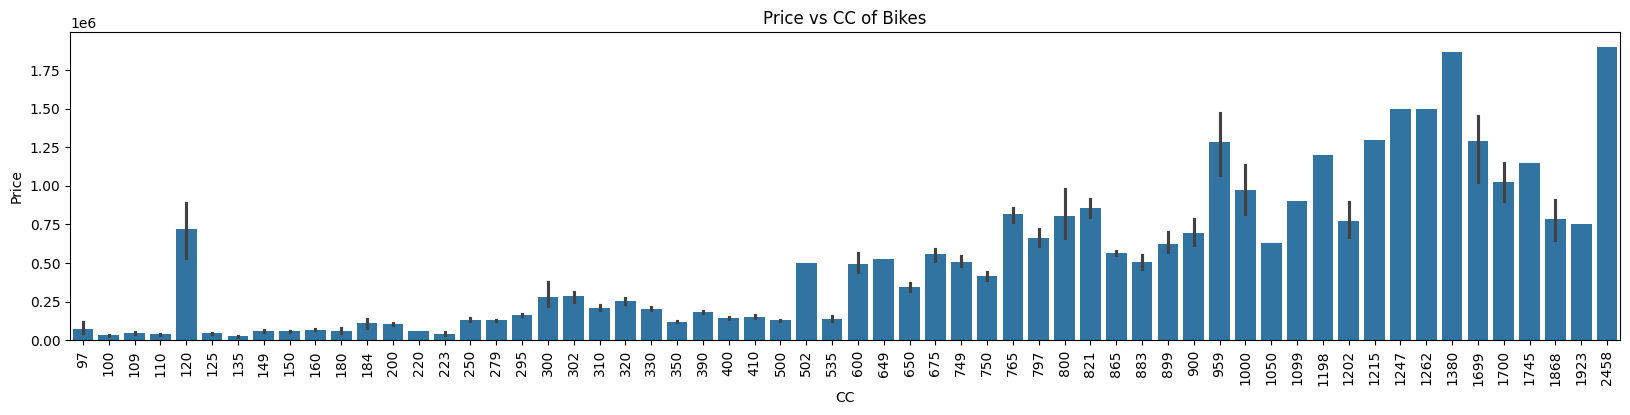

In [169]:
# Plotting a line plot for Price vs CC
plt.figure(figsize=(20,4))
sns.barplot(x=data['cc'], y=data['price'])
plt.title("Price vs CC of Bikes")
plt.xlabel("CC")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

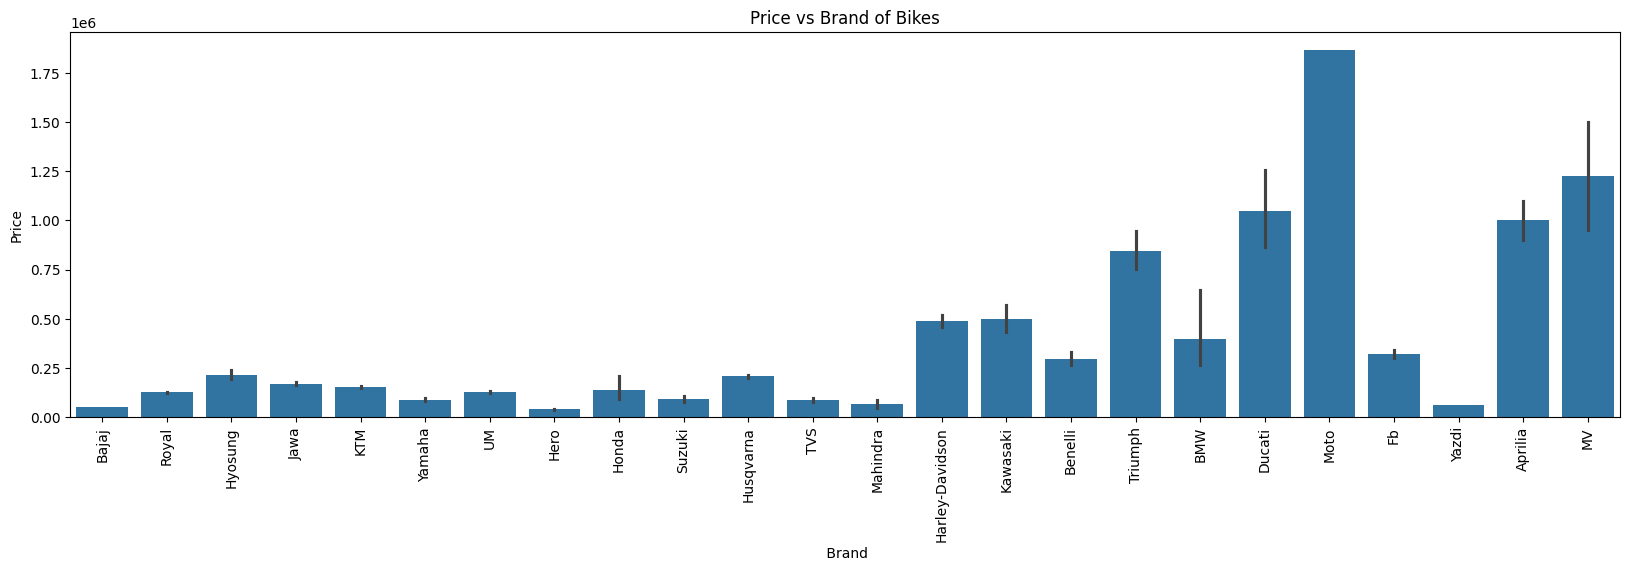

In [185]:
#PLOT BRAND AND PRICE
plt.figure(figsize=(20,5))
sns.barplot(x=data['brand'], y=data['price'])
plt.title("Price vs Brand of Bikes")
plt.xlabel(" Brand")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

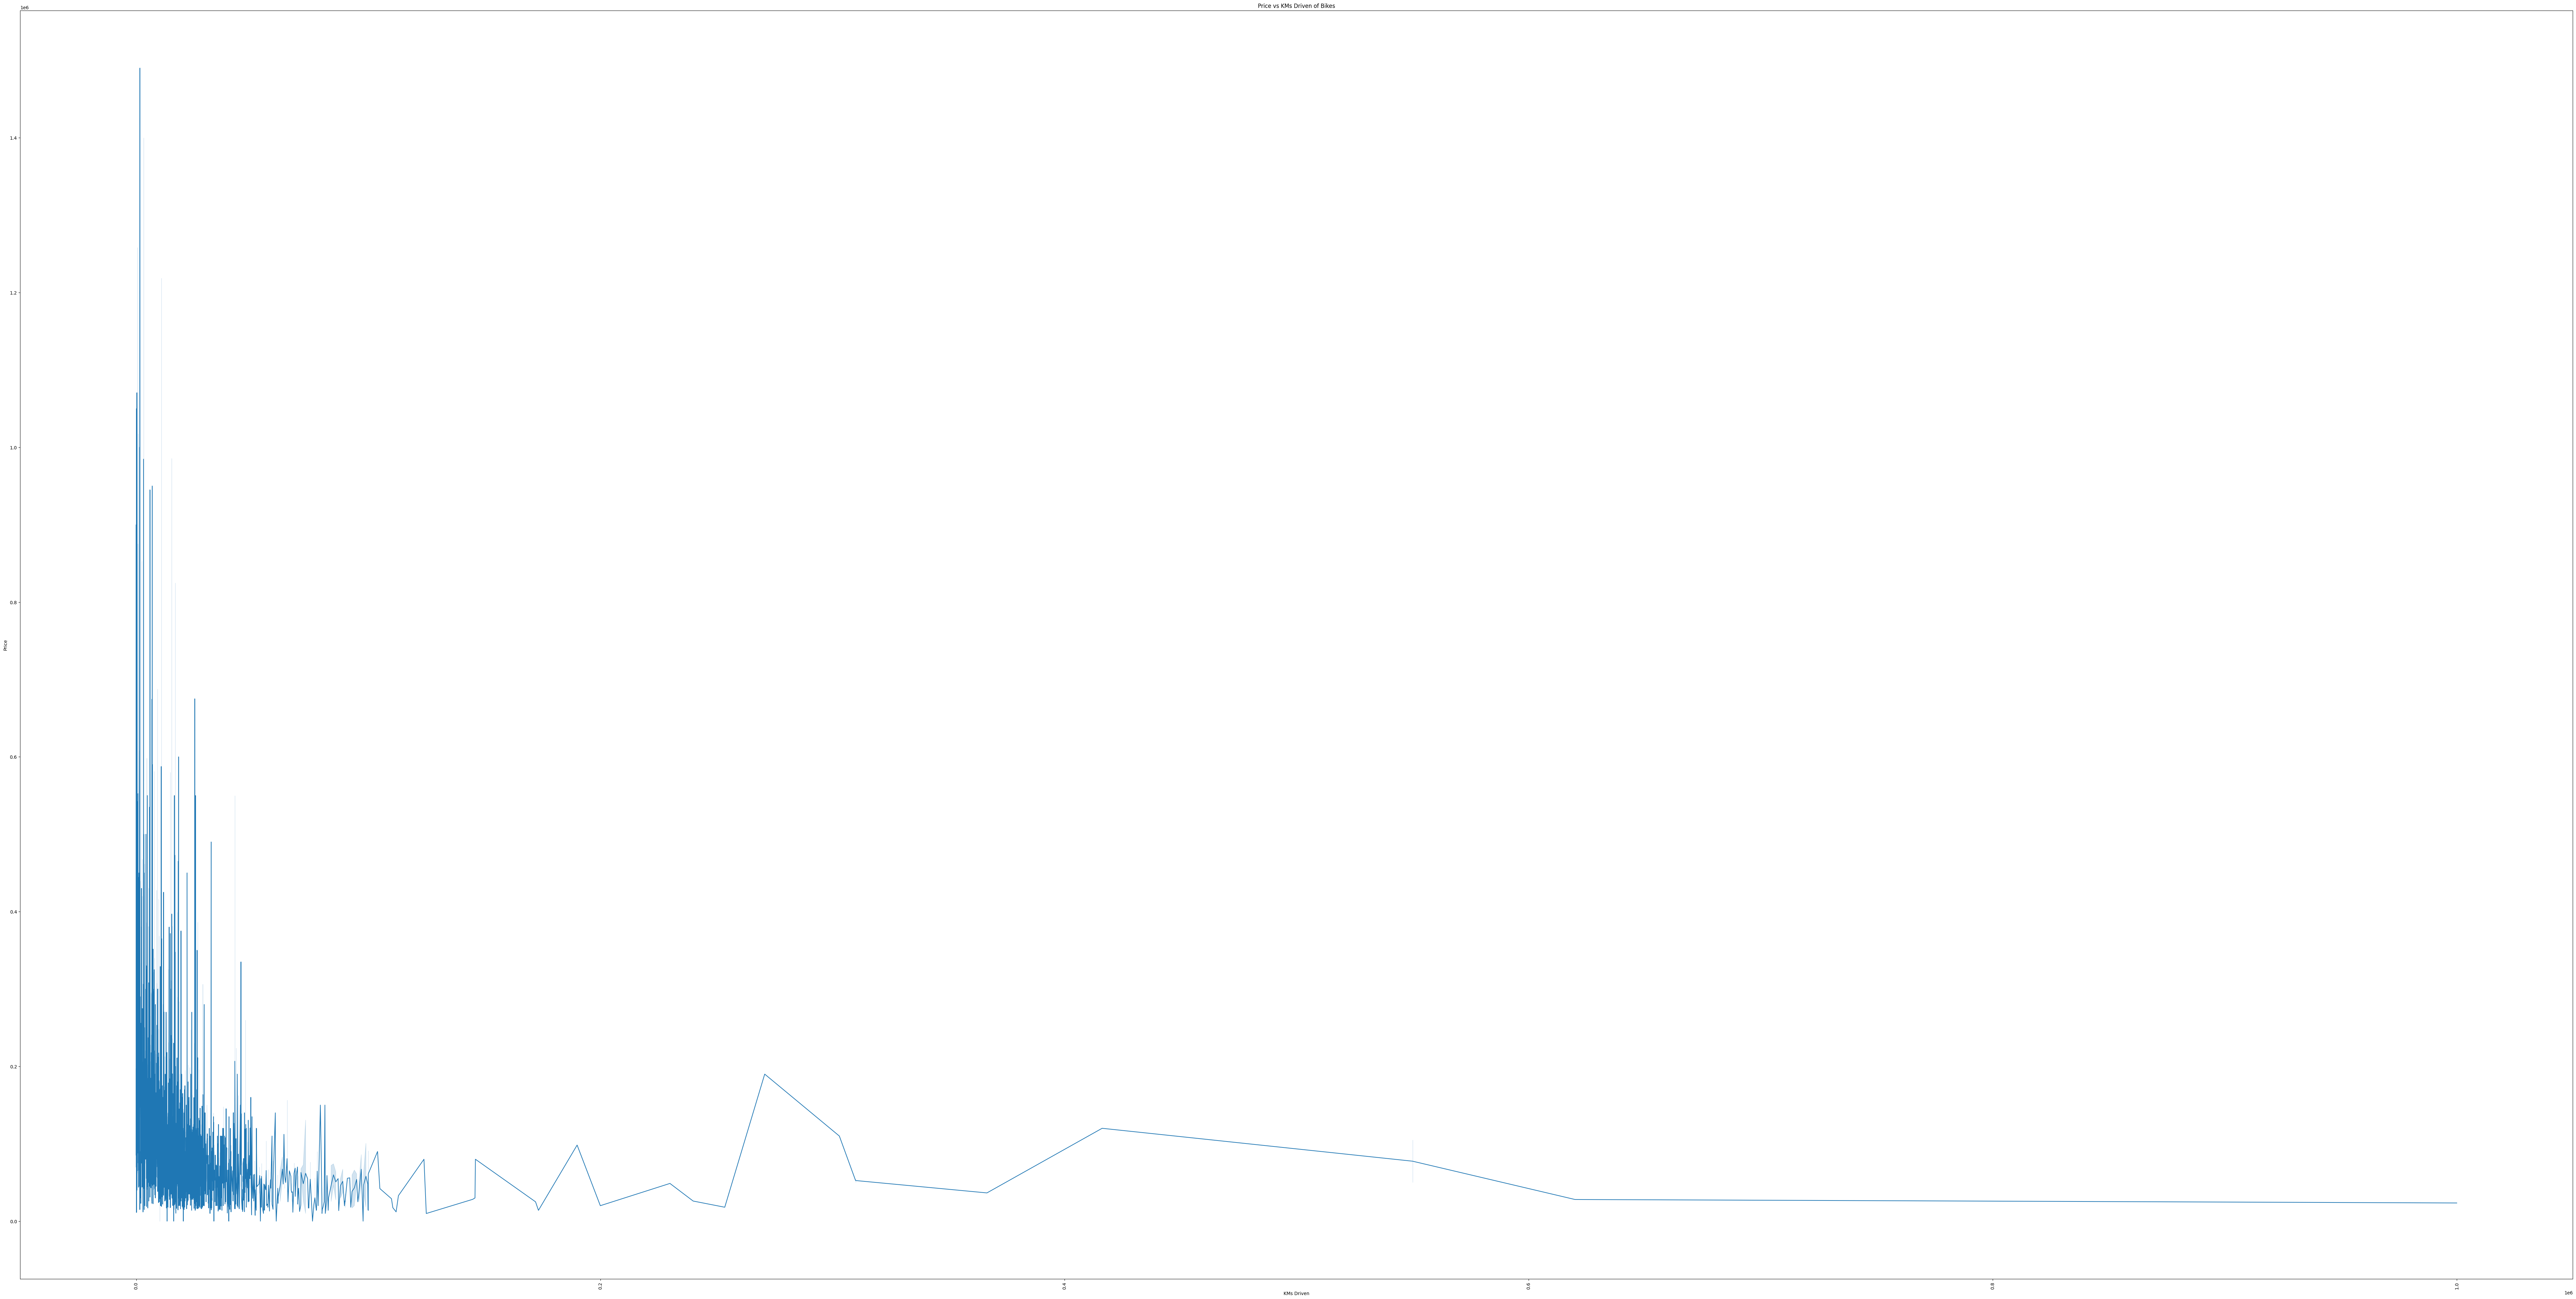

In [182]:
#how kms driven affect the bike price
plt.figure(figsize=(100,50))
sns.lineplot(x=data['kms_driven'], y=data['price'])
plt.title("Price vs KMs Driven of Bikes")
plt.xlabel("KMs Driven")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

LET ME ELABORATE THIS CHART :
THIS CHART SGOW RIGHT SKEWNESS WHICH SIMPLY SIGNIFIES THAT AS THE MORE VALUE OF KMS DRIVEN , THE LESS THE VALUES OF PRICE OF BIKE

Text(0, 0.5, 'Count')

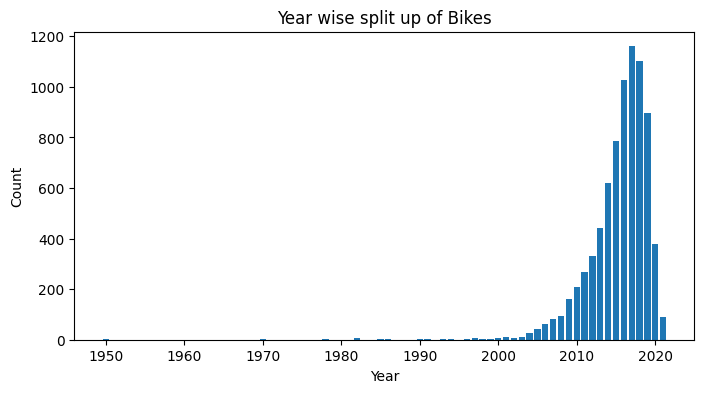

In [152]:
#YEAR WISE SPLIT OF THE BIKES
plt.figure(figsize=(8,4))
x,count=np.unique(data.model_year,return_counts=True)
plt.bar(x,count)
plt.title("Year wise split up of Bikes")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

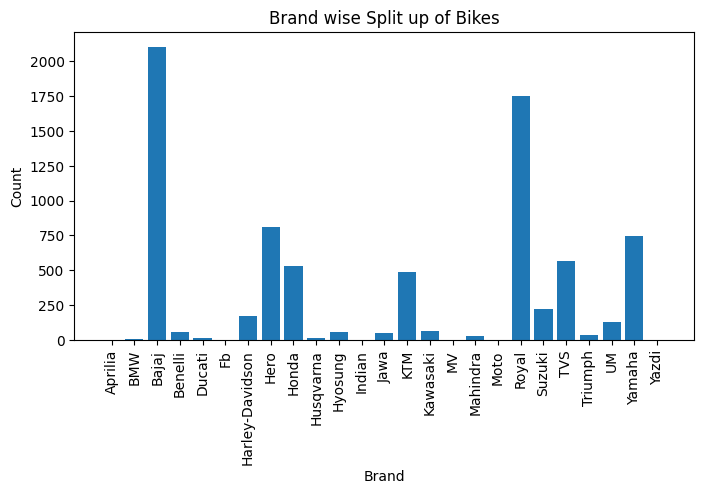

In [151]:
plt.figure(figsize=(8,4))
x,count=np.unique(data.brand,return_counts=True)
plt.bar(x,count)
plt.title("Brand wise Split up of Bikes")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Count")

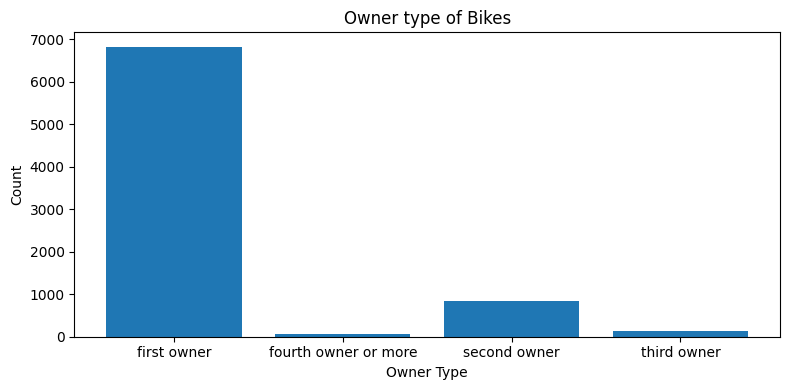

In [153]:
plt.figure(figsize=(8,4))
x,count = np.unique(data.owner,return_counts=True)
plt.bar(x,count)
plt.title("Owner type of Bikes")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

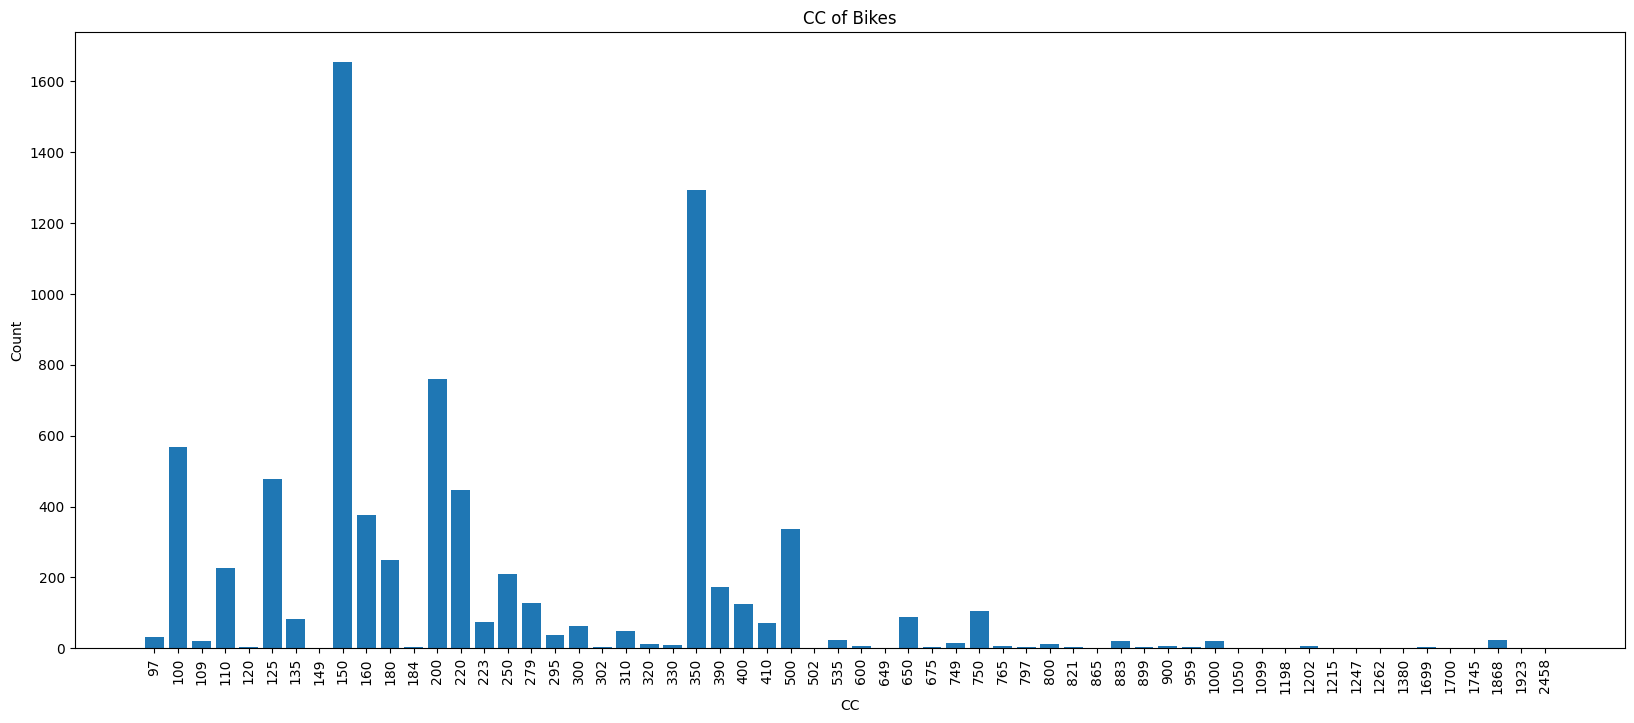

In [156]:
plt.figure(figsize=(20,8))
x,count = np.unique(data.cc,return_counts=True)
plt.bar([str(i) for i in x],count)
plt.title("CC of Bikes")
plt.xlabel("CC")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()